## 데이터 전처리
#### 1. 레이블 인코딩
- 프로그램 설치:
    - conda activate base
    - pip install tensorflow    

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()         # 클래스를 쓰려면 항상 객체를 만들어야함 

In [13]:
items = ['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

In [14]:
# 학습
le.fit(items)

LabelEncoder()

In [16]:
# 변환 ( 가나다 순서대로 레이블 인코딩 됨 )
# 0, 1, 4 ..... 0번은 T , 4번째는 ㄴ, 3번째는 ㅅ 이렇게.
labels =le.transform(items)
labels

array([0, 1, 4, 5, 3, 3, 2, 2])

In [17]:
# 단축 형태
labels = le.fit_transform(items)
labels

array([0, 1, 4, 5, 3, 3, 2, 2], dtype=int64)

In [18]:
# 고수들은 아래와 같이
labels = LabelEncoder().fit_transform(items)
labels

array([0, 1, 4, 5, 3, 3, 2, 2], dtype=int64)

In [19]:
# decoding
le.inverse_transform([1, 3, 5, 0])

array(['냉장고', '선풍기', '컴퓨터', 'TV'], dtype='<U4')

#### 2. One hot encoding
- 프로그램 설치:
    - conda activate base
    - pip install tensorflow

In [22]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
oh_labels = ohe.fit_transform(labels.reshape(-1,1))
oh_labels.toarray()

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [24]:
from tensorflow.keras.utils import to_categorical
to_categorical(labels)

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

#### 3. 표준화
- 평균 0, 표준편차 1인 표준정규분포로 변환

In [25]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [26]:
from sklearn.datasets import load_iris
iris = load_iris()

In [33]:
iris_std = ss.fit_transform(iris.data)
print('변환전:', iris.data[0])
print('변환후:', iris_std[0],)

변환전: [5.1 3.5 1.4 0.2]
변환후: [-0.90068117  1.01900435 -1.34022653 -1.3154443 ]


In [45]:
# 모든 열이 표준정규분포로 변환되었음을 확인
for i in range(4):
    print(iris_std[:, i].mean(), iris_std[:, i].std())         # -1.4684549872375404e-15: 0에 수렴한 값

-1.4684549872375404e-15 1.0
-1.8237263551175904e-15 1.0000000000000004
-1.6105635343895603e-15 0.9999999999999999
-9.473903143468002e-16 1.0


- 로지스틱 회귀(Logistic Regression) 사례

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

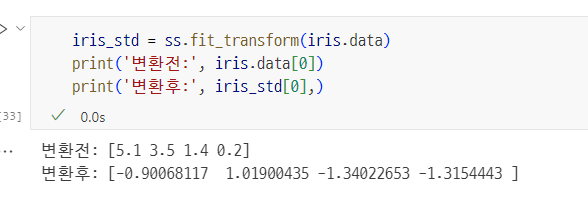

In [38]:
# 변환하지 않은 데이터로 분류
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target, test_size=0.2, random_state=2023
)


# max_iter 값이 100으로 설정되어 있어서 에러 발생
lr = LogisticRegression()
lr.fit(X_train, y_train)

c:\Users\human\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [41]:
lr = LogisticRegression(max_iter=500) # max_iter 값을 500으로 변경
lr.fit(X_train, y_train)

LogisticRegression(max_iter=500)

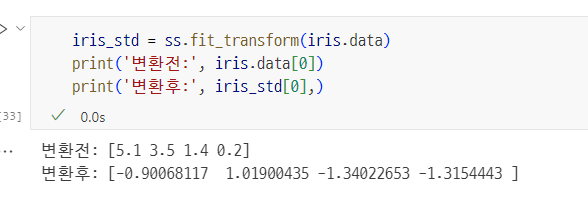

In [42]:
# 변환한 데이터로 분류
X_train, X_test, y_train, y_test = train_test_split(
    iris_std, iris.target, stratify=iris.target, test_size=0.2, random_state=2023
)

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

#### 4. 정규화(Normalization)
- 최소값: 0, 최대값: 1로 변환

In [46]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [48]:
from sklearn.datasets import load_digits
digis = load_digits()
digis.data.shape
# 1797 : 데이터개수
# 64 : 레이블수 (8x8 테이블)

(1797, 64)

In [49]:
# 변환전 데이터
digis.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [52]:
digis.data.min(), digis.data.max()

(0.0, 16.0)

In [53]:
# 변환후 데이터
digis_mm = mms.fit_transform(digis.data)
digis_mm[0]
# 자주사용 외워두기: fit_transform

array([0.        , 0.        , 0.3125    , 0.8125    , 0.5625    ,
       0.0625    , 0.        , 0.        , 0.        , 0.        ,
       0.8125    , 0.9375    , 0.625     , 0.9375    , 0.3125    ,
       0.        , 0.        , 0.1875    , 0.9375    , 0.125     ,
       0.        , 0.6875    , 0.5       , 0.        , 0.        ,
       0.26666667, 0.75      , 0.        , 0.        , 0.5       ,
       0.53333333, 0.        , 0.        , 0.35714286, 0.5       ,
       0.        , 0.        , 0.5625    , 0.57142857, 0.        ,
       0.        , 0.25      , 0.6875    , 0.        , 0.0625    ,
       0.75      , 0.4375    , 0.        , 0.        , 0.125     ,
       0.875     , 0.3125    , 0.625     , 0.75      , 0.        ,
       0.        , 0.        , 0.        , 0.375     , 0.8125    ,
       0.625     , 0.        , 0.        , 0.        ])

In [55]:
# 쉽게 하는 방법
digis_easy = digis.data / 16.0          # 최댓값으로 나눠줌
digis_easy[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])